In [5]:
import pandas as pd 
import xgboost as xgb
import numpy as np
import random
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score,GridSearchCV, KFold
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
train_data = pd.read_csv('train_ml2_2021.csv')

In [7]:
test_data = pd.read_csv('test0.csv')

In [8]:
train_data.head(10)

,problem_id,v0,v1,v2,v3,v4,v5,v6,v7,v8,...,v969,v970,v971,v972,v973,v974,v975,v976,v977,target
0,0,0.35,0.36,0.77,0.42,0.48,0.12,0.43,0.49,0.19,...,0.77,0.57,0.56,0.40,0.75,0.08,0.14,0.43,0.88,0
1,0,0.12,0.17,0.38,0.43,0.57,0.09,0.11,0.58,0.35,...,0.07,0.59,0.06,0.17,0.09,0.04,0.04,0.45,0.14,1
2,0,0.67,0.16,0.85,0.41,0.57,0.27,0.83,0.73,0.26,...,0.24,0.42,0.57,0.58,0.37,0.01,0.10,0.38,0.06,1
3,0,0.70,0.20,0.62,0.41,0.41,0.10,0.80,0.52,0.82,...,0.04,0.52,0.25,0.07,0.23,0.04,0.76,0.41,0.59,1
4,0,0.72,0.75,0.74,0.42,0.41,0.76,0.34,0.72,0.06,...,0.81,0.41,0.16,0.03,0.21,0.10,0.12,0.53,0.30,1
5,0,0.53,0.23,0.27,0.46,0.57,0.06,0.35,0.25,0.10,...,0.22,0.37,0.57,0.25,0.16,0.01,0.68,0.42,0.16,1
6,0,0.61,0.52,0.25,0.43,0.65,0.05,0.49,0.24,0.18,...,0.01,0.39,0.06,0.05,0.04,0.01,0.33,0.41,0.25,1
7,0,0.24,0.12,0.25,0.44,0.47,0.77,0.65,0.31,0.50,...,0.09,0.56,0.21,0.65,0.16,0.01,0.14,0.41,0.13,1
8,0,0.65,0.38,0.27,0.50,0.50,0.09,0.65,0.29,0.77,...,0.38,0.29,0.64,0.45,0.33,0.03,0.03,0.49,0.20,1
9,0,0.39,0.20,0.07,0.43,0.37,0.12,0.41,0.17,0.60,...,0.02,0.56,0.24,0.83,0.04,0.01,0.14,0.69,0.02,1


In [9]:
train_data.describe()

,problem_id,v0,v1,v2,v3,v4,v5,v6,v7,v8,...,v969,v970,v971,v972,v973,v974,v975,v976,v977,target
count,8302.000000,8302.000000,8302.000000,8302.000000,8302.000000,8302.000000,8302.000000,8302.000000,8302.000000,8302.000000,...,8302.000000,8302.000000,8302.000000,8302.000000,8302.000000,8302.000000,8302.000000,8302.000000,8302.000000,8302.000000
mean,10.340520,0.503570,0.502644,0.498356,0.505302,0.524481,0.509112,0.515471,0.501418,0.502067,...,0.513447,0.504952,0.506437,0.495670,0.498960,0.517119,0.503209,0.501382,0.506916,0.659359
std,6.183559,0.267315,0.271960,0.273268,0.273052,0.363815,0.326855,0.319661,0.248639,0.312049,...,0.335301,0.314542,0.285526,0.295917,0.252681,0.276100,0.308813,0.278673,0.294042,0.782339
min,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000
25%,5.000000,0.290000,0.280000,0.270000,0.280000,0.140000,0.200000,0.220000,0.300000,0.210000,...,0.180000,0.220000,0.250000,0.230000,0.300000,0.290000,0.210000,0.270000,0.240000,0.000000
50%,11.000000,0.510000,0.510000,0.500000,0.500000,0.540000,0.520000,0.555000,0.510000,0.500000,...,0.540000,0.510000,0.510000,0.460000,0.500000,0.530000,0.500000,0.500000,0.520000,1.000000
75%,16.000000,0.710000,0.730000,0.720000,0.750000,0.890000,0.830000,0.800000,0.700000,0.790000,...,0.840000,0.800000,0.770000,0.770000,0.680000,0.750000,0.790000,0.730000,0.770000,1.000000
max,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [10]:
test_data.describe()

,obs_id,problem_id,v0,v1,v2,v3,v4,v5,v6,v7,...,v969,v970,v971,v972,v973,v974,v975,v976,v977,target
count,2041.00000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,...,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.00000,2041.000000,2041.000000,2041.000000,2041.0
mean,1020.00000,10.363547,0.513959,0.501543,0.487594,0.507438,0.531984,0.490039,0.511068,0.499270,...,0.497825,0.506619,0.510299,0.490990,0.494561,0.49755,0.503895,0.494219,0.502719,0.0
std,589.33027,6.191560,0.263926,0.269277,0.269170,0.278779,0.362739,0.322781,0.319385,0.248713,...,0.331057,0.307033,0.275820,0.300327,0.253686,0.27802,0.298301,0.278425,0.296395,0.0
min,0.00000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.01000,0.010000,0.010000,0.010000,0.0
25%,510.00000,5.000000,0.330000,0.280000,0.270000,0.270000,0.150000,0.180000,0.220000,0.300000,...,0.180000,0.220000,0.280000,0.220000,0.300000,0.26000,0.230000,0.260000,0.230000,0.0
50%,1020.00000,11.000000,0.510000,0.500000,0.470000,0.520000,0.540000,0.470000,0.530000,0.500000,...,0.490000,0.500000,0.520000,0.450000,0.500000,0.48000,0.510000,0.490000,0.520000,0.0
75%,1530.00000,16.000000,0.720000,0.720000,0.700000,0.750000,0.900000,0.800000,0.800000,0.700000,...,0.820000,0.790000,0.750000,0.780000,0.690000,0.73000,0.770000,0.730000,0.770000,0.0
max,2040.00000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.990000,0.0


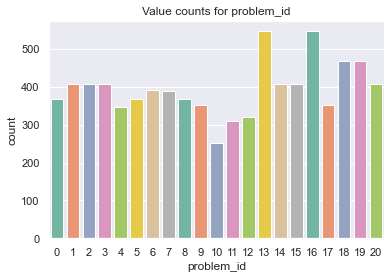

In [11]:
sns.set_theme(style="darkgrid")
count_problemid = sns.countplot(x="problem_id",data= train_data,palette="Set2")
plt.title("Value counts for problem_id")
fig = count_problemid.get_figure()
fig.savefig('count_plot_problemid')

In [12]:
train_data['problem_id'].value_counts()

13    547
16    547
19    469
18    469
15    408
2     408
14    408
20    408
1     408
3     408
6     393
7     388
8     369
0     369
5     369
17    352
9     352
4     347
12    320
11    310
10    253
Name: problem_id, dtype: int64

In [14]:
train_data['target'].value_counts()

0    4124
1    3175
2     729
3     255
4      19
Name: target, dtype: int64

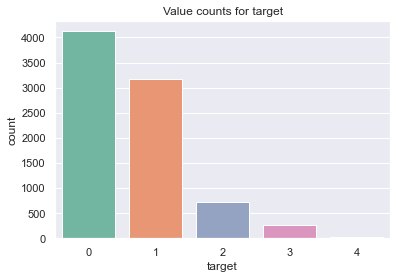

In [15]:
sns.set_theme(style="darkgrid")
count_problemid = sns.countplot(x="target",data= train_data,palette="Set2")
plt.title("Value counts for target")
fig = count_problemid.get_figure()
fig.savefig('count_plot_target')

In [16]:
X_train = train_data.iloc[:,:-1]

In [17]:
X_test = test_data.iloc[:,1:-1]

In [18]:
y_train = train_data.iloc[:,-1]

In [19]:
y_train

0       0
1       1
2       1
3       1
4       1
       ..
8297    0
8298    0
8299    0
8300    0
8301    1
Name: target, Length: 8302, dtype: int64

In [20]:
X_train

,problem_id,v0,v1,v2,v3,v4,v5,v6,v7,v8,...,v968,v969,v970,v971,v972,v973,v974,v975,v976,v977
0,0,0.35,0.36,0.77,0.42,0.48,0.12,0.43,0.49,0.19,...,1.00,0.77,0.57,0.56,0.40,0.75,0.08,0.14,0.43,0.88
1,0,0.12,0.17,0.38,0.43,0.57,0.09,0.11,0.58,0.35,...,0.39,0.07,0.59,0.06,0.17,0.09,0.04,0.04,0.45,0.14
2,0,0.67,0.16,0.85,0.41,0.57,0.27,0.83,0.73,0.26,...,0.65,0.24,0.42,0.57,0.58,0.37,0.01,0.10,0.38,0.06
3,0,0.70,0.20,0.62,0.41,0.41,0.10,0.80,0.52,0.82,...,0.96,0.04,0.52,0.25,0.07,0.23,0.04,0.76,0.41,0.59
4,0,0.72,0.75,0.74,0.42,0.41,0.76,0.34,0.72,0.06,...,0.99,0.81,0.41,0.16,0.03,0.21,0.10,0.12,0.53,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8297,20,0.91,0.76,0.45,0.81,0.99,0.20,0.36,0.28,0.02,...,0.81,0.75,0.92,0.86,0.84,0.86,0.52,0.04,0.77,0.68
8298,20,0.31,0.93,0.45,0.61,0.99,0.09,0.73,0.25,0.56,...,0.53,0.36,0.93,0.61,0.65,0.65,0.31,0.06,0.89,0.11
8299,20,0.92,0.82,0.52,0.61,0.94,0.67,0.65,0.34,0.25,...,0.40,0.80,0.74,0.94,0.76,0.61,0.72,0.14,0.11,0.91
8300,20,0.93,0.85,0.51,0.64,0.95,0.76,0.76,0.36,0.07,...,0.71,0.33,0.92,0.24,0.89,0.84,0.54,0.13,0.91,0.95


In [21]:
X_test

,problem_id,v0,v1,v2,v3,v4,v5,v6,v7,v8,...,v968,v969,v970,v971,v972,v973,v974,v975,v976,v977
0,2,0.60,0.05,0.50,0.79,0.06,0.72,0.51,0.34,0.41,...,0.72,0.50,0.34,0.72,0.12,0.66,0.75,0.52,0.74,0.35
1,2,0.55,0.08,0.62,0.52,0.05,0.46,0.20,0.11,0.17,...,0.22,0.68,0.68,0.78,0.17,0.45,0.50,0.59,0.57,0.74
2,2,0.35,0.85,0.42,0.39,0.04,0.68,0.54,0.55,0.10,...,0.26,0.77,0.40,0.72,0.79,0.29,0.47,0.49,0.75,0.63
3,2,0.45,0.63,0.42,0.58,0.03,0.83,0.73,0.23,0.15,...,0.24,0.76,0.42,0.30,0.06,0.40,0.56,0.42,0.81,0.54
4,2,0.47,0.11,0.45,0.78,0.43,0.57,0.66,0.39,0.68,...,0.37,0.69,0.76,0.34,0.10,0.61,0.56,0.40,0.40,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,16,0.37,0.77,0.31,0.85,0.81,1.00,0.97,0.39,0.45,...,1.00,0.34,0.67,0.63,0.46,0.37,0.36,0.89,0.73,0.49
2037,16,0.93,0.21,0.35,0.91,0.84,0.83,0.95,0.86,0.68,...,0.20,0.21,0.41,0.61,0.68,0.54,0.58,0.16,0.89,0.22
2038,16,0.59,0.98,0.64,0.72,0.06,0.93,0.87,0.41,0.28,...,0.97,0.84,0.79,0.48,0.42,0.48,0.60,0.87,0.29,0.38
2039,16,0.23,0.79,0.53,0.85,0.06,0.98,0.12,0.22,0.41,...,0.16,0.90,0.31,0.29,0.37,0.49,0.73,0.80,0.56,0.46


In [108]:
dtrain = xgb.DMatrix(X_train,label=y_train)

In [109]:
#best parameters
params = {
    'max_depth': 9,
    'min_child_weight': 7,
    'subsample': 0.855360755632557,
    'colsample_bytree': 0.9022862562328121,
    'lambda': 1.9708585341805176, 
    'alpha': 1.2289412421792536,
    'objective':'multi:softmax',
    'num_class':5,
    'eta':0.015,
}

In [110]:
cv_results = xgb.cv(
    params,
    dtrain,
    seed=42,
    nfold=5,
    metrics={'mlogloss'},
    early_stopping_rounds=10,
    num_boost_round=999,
    stratified = True)

KeyboardInterrupt: 

In [ ]:
cv_results

In [145]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=803)

[14:02:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [146]:
y_pred_xgb = model.predict(dtest)

In [149]:
submit_df = pd.DataFrame({"obs_id":test_data['obs_id'],"target":y_pred_xgb},dtype=int)
submit_df.set_index('obs_id',inplace=True)

In [150]:
submit_df.to_csv('submit_xgb.csv')

### LightGBM

In [28]:
#train_matrix = lgb.Dataset(data=train_data.iloc(axis=1)[:-1],label=train_data.target,params={'verbose': -1})

In [30]:
params = {'boosting_type': 'dart',
 'drop_rate': 0.1,
 'drop_seed': 42,
 'learning_rate': 0.1,
 'objective': 'multiclass',
 'num_class': 5,
 'max_depth': 12,
 'num_leaves': 142,
 'min_hessian': 7.1321822734742755,
 'feature_fraction': 0.955,
 'lambda_l1': 1.0639591744026005,
 'lambda_l2': 9.708144779276575,
 'verbose': -1}

In [68]:
model_dict = dict()
unique_problem_id = X_train['problem_id'].unique()
for i in unique_problem_id:
    train_matrix = lgb.Dataset(data=X_train.loc[X_train['problem_id']==i],label=y_train.loc[X_train['problem_id']==i],params={'verbose': -1})
    model = lgb.train(
    params,
    train_matrix,
    num_boost_round=275,
    categorical_feature=['problem_id'])
    model_dict[i] = model

/Users/hashneetkaur/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['problem_id']
  _log_warning('categorical_feature in Dataset is overridden.\n'


In [67]:

# model = lgb.train(
#     params,
#     train_matrix,
#     num_boost_round=275,
#     categorical_feature=['problem_id'])

In [107]:
ypred_final = []
for index, row in X_test.iterrows():
    model_selected = model_dict[row['problem_id']]
    ypred = model_selected.predict(row)
    ypred_final.append(ypred)
ypred_df = pd.DataFrame([np.argmax(i) for i in ypred_final])
submit_df = pd.DataFrame({'obs_id':test_data['obs_id'],'target':ypred_df[0]},dtype=int)
submit_df.set_index('obs_id',inplace=True)
submit_df.to_csv('submit_lgb.csv')

In [12]:
# ypred = model.predict(X_test)
# ypred_df = pd.DataFrame(ypred).apply(lambda x: np.argmax(x), axis=1)
# submit_df = pd.DataFrame({'obs_id':test_data.obs_id,'target':ypred_df.values},dtype=int)
# submit_df.set_index('obs_id',inplace=True)
# submit_df.to_csv('submit_lgb.csv')